# Import e dataset

In [1]:


import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from plot_silhouette import plot_silhouette
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm
from matplotlib import pyplot as plt

df = pd.read_csv('nuovoETSDBv38.csv',sep =";")

# Pulizia e creazione dataset

In [202]:
df.head()

,country,country_code,ETS information,main activity sector name,unit,value,year
0,Belgium,BE,2. Verified emissions,35 Production of pulp,tonne of CO2 equ.,102581.0,2009
1,Belgium,BE,2. Verified emissions,35 Production of pulp,tonne of CO2 equ.,106671.0,2011
2,Belgium,BE,2. Verified emissions,35 Production of pulp,tonne of CO2 equ.,126702.0,2012
3,Belgium,BE,4. Total surrendered units,35 Production of pulp,tonne of CO2 equ.,98349.0,2007
4,Belgium,BE,4. Total surrendered units,35 Production of pulp,tonne of CO2 equ.,96708.0,2008


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    57394 non-null  object 
 1   country_code               57394 non-null  object 
 2   ETS information            57394 non-null  object 
 3   main activity sector name  57394 non-null  object 
 4   unit                       57394 non-null  object 
 5   value                      57238 non-null  float64
 6   year                       57394 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.1+ MB


In [9]:
df['country'].value_counts()

Germany             3143
Spain               2885
United Kingdom      2693
France              2579
Sweden              2478
Italy               2434
Poland              2427
Belgium             2401
Finland             2365
Hungary             2332
Netherlands         2287
Austria             2281
Czechia             2260
Romania             2097
Slovakia            2069
Portugal            1948
Greece              1918
Slovenia            1820
Bulgaria            1782
Norway              1614
Latvia              1560
Lithuania           1541
Denmark             1521
Estonia             1496
Ireland             1276
Croatia             1134
Luxembourg          1056
Cyprus               775
Iceland              540
Malta                359
Liechtenstein        287
NER 300 auctions      36
Name: country, dtype: int64

CHECK

In [206]:
df[df['country'] == 'Iceland']

,country,country_code,ETS information,main activity sector name,unit,value,year
55,Iceland,IS,1.1.2 Free allocation from the new entrants re...,26 Production of primary aluminium,tonne of CO2 equ.,0.000000e+00,2018
56,Iceland,IS,2. Verified emissions,26 Production of primary aluminium,tonne of CO2 equ.,1.400184e+06,2017
57,Iceland,IS,4.1 Surrendered EU allowances (EUAs and EUAAs),26 Production of primary aluminium,tonne of CO2 equ.,0.000000e+00,2010
686,Iceland,IS,4.1 Surrendered EU allowances (EUAs and EUAAs),21-99 All industrial installations (excl. comb...,tonne of CO2 equ.,0.000000e+00,Total 2nd trading period (08-12)
799,Iceland,IS,4. Total surrendered units,26 Production of primary aluminium,tonne of CO2 equ.,1.408924e+06,2015
800,Iceland,IS,4.1 Surrendered EU allowances (EUAs and EUAAs),26 Production of primary aluminium,tonne of CO2 equ.,0.000000e+00,2008
801,Iceland,IS,4.3 Surrendered emission reduction units (ERUs),26 Production of primary aluminium,tonne of CO2 equ.,0.000000e+00,2010
1092,Iceland,IS,1. Total allocated allowances (EUA or EUAA),10 Aviation,tonne of CO2 equ.,1.943750e+05,2016
1105,Iceland,IS,1. Total allocated allowances (EUA or EUAA),20-99 All stationary installations,tonne of CO2 equ.,0.000000e+00,2010
1133,Iceland,IS,1. Total allocated allowances (EUA or EUAA),10 Aviation,tonne of CO2 equ.,0.000000e+00,2010


# Creo 3 df per gli intervalli descritti nel dataset:
# - 05-07 ,  08-12 , 13-20

In [208]:
periodo = ['Total 1st trading period (05-07)','Total 2nd trading period (08-12)','Total 3rd trading period (13-20)']
n_anni_periodo = [3,5,7]
lista_periodi_df = [[],[],[]]

for i in range(3):
    tmp_df = df[df.year == periodo[i]]
    tmp_df = tmp_df[tmp_df['ETS information'] == '2. Verified emissions']
    tmp_df = tmp_df.drop(tmp_df[tmp_df['main activity sector name'] == '20-99 All stationary installations'].index)
    tmp_df = tmp_df.drop(tmp_df[tmp_df['main activity sector name'] == '21-99 All industrial installations (excl. combustion)'].index)
    del tmp_df['unit']
    del tmp_df['ETS information']
    tmp_df = tmp_df.sort_values(by=['country_code'])
    tmp_df['value'] = tmp_df['value'] / n_anni_periodo[i]
    lista_periodi_df[i] = tmp_df

 

In [209]:
lista_periodi_df[0]

,country,country_code,main activity sector name,value,year
57217,Austria,AT,32 Manufacture of ceramics,4.616447e+05,Total 1st trading period (05-07)
56779,Austria,AT,99 Other activity opted-in under Art. 24,0.000000e+00,Total 1st trading period (05-07)
27496,Austria,AT,36 Production of paper or cardboard,1.486090e+06,Total 1st trading period (05-07)
56844,Austria,AT,31 Manufacture of glass,2.147473e+05,Total 1st trading period (05-07)
11968,Austria,AT,24 Production of pig iron or steel,6.213503e+06,Total 1st trading period (05-07)
56849,Austria,AT,22 Production of coke,1.216800e+06,Total 1st trading period (05-07)
57207,Austria,AT,29 Production of cement clinker,2.962872e+06,Total 1st trading period (05-07)
24487,Austria,AT,42 Production of bulk chemicals,7.112400e+04,Total 1st trading period (05-07)
37424,Austria,AT,38 Production of nitric acid,0.000000e+00,Total 1st trading period (05-07)
52558,Austria,AT,35 Production of pulp,5.395427e+05,Total 1st trading period (05-07)


AGGIUNGO 4 RIGHE MANCANTI PER L'ANNO 05-07 PER COERENZA DEI DATI. VENGONO INSERITE IN EMISSIONI VERIFICATE CON EMISSIONE A 0

In [204]:
#mancanti sono lic islanda hung e no
row_arr =  [{'country':'Iceland','country_code':'IS','ETS information':'2. Verified emissions','main activity sector name':'35 Production of pulp','unit':'tonne of CO2 equ.','value':0,'year':'Total 1st trading period (05-07)'},
           {'country':'Croatia','country_code':'HR','ETS information':'2. Verified emissions','main activity sector name':'35 Production of pulp','unit':'tonne of CO2 equ.','value':0,'year':'Total 1st trading period (05-07)'},
           {'country':'Liechtenstein','country_code':'LI','ETS information':'2. Verified emissions','main activity sector name':'35 Production of pulp','unit':'tonne of CO2 equ.','value':0,'year':'Total 1st trading period (05-07)'},
           {'country':'Hungary','country_code':'HU','ETS information':'2. Verified emissions','main activity sector name':'35 Production of pulp','unit':'tonne of CO2 equ.','value':0,'year':'Total 1st trading period (05-07)'},
           {'country':'Norway','country_code':'NO','ETS information':'2. Verified emissions','main activity sector name':'35 Production of pulp','unit':'tonne of CO2 equ.','value':0,'year':'Total 1st trading period (05-07)'}]


for i in range(4):    
     lista_periodi_df[0] = lista_periodi_df[0].append(row_arr[i], ignore_index=True)


# unstack e groupby 

In [213]:
basket_tot = [[],[],[]]

for i in range(3):
    basket_tot[i] = (lista_periodi_df[i]
              .groupby(['year','country','main activity sector name'])['value']
              .sum().unstack().reset_index().fillna(0)
              .set_index('country'))

# Inserisco il nuovo index (year) 

In [217]:
for i in range(3):
    basket_tot[i] = basket_tot[i].set_index('year', append = True)

In [218]:
basket_tot[0]

,main activity sector name,20 Combustion of fuels,21 Refining of mineral oil,22 Production of coke,23 Metal ore roasting or sintering,24 Production of pig iron or steel,25 Production or processing of ferrous metals,26 Production of primary aluminium,27 Production of secondary aluminium,28 Production or processing of non-ferrous metals,29 Production of cement clinker,"30 Production of lime, or calcination of dolomite/magnesite",31 Manufacture of glass,32 Manufacture of ceramics,33 Manufacture of mineral wool,34 Production or processing of gypsum or plasterboard,35 Production of pulp,36 Production of paper or cardboard,37 Production of carbon black,38 Production of nitric acid,41 Production of ammonia,42 Production of bulk chemicals,43 Production of hydrogen and synthesis gas,44 Production of soda ash and sodium bicarbonate,99 Other activity opted-in under Art. 24
country,year,,,,,,,,,,,,,,,,,,,,,,,,
Austria,Total 1st trading period (05-07),1.531312e+07,2.841510e+06,1.216800e+06,0.000000e+00,6.213503e+06,0.000000e+00,0.000000,0.000000,0.000000,2.962872e+06,1.181974e+06,2.147473e+05,4.616447e+05,0.000000,0.000000,5.395427e+05,1.486090e+06,0.000000,0.000000,0.000000e+00,7.112400e+04,0.000000,0.000000,0.000000
Belgium,Total 1st trading period (05-07),2.442207e+07,5.630869e+06,1.244977e+05,0.000000e+00,8.915267e+06,4.950463e+05,9835.666667,11699.333333,169420.333333,5.016599e+06,3.286059e+06,1.288695e+06,6.486360e+05,62619.000000,0.000000,1.113360e+05,6.219800e+05,0.000000,284624.666667,0.000000e+00,3.212039e+06,0.000000,0.000000,0.000000
Bulgaria,Total 1st trading period (05-07),1.037355e+07,9.123517e+05,0.000000e+00,0.000000e+00,5.817100e+04,1.077733e+04,0.000000,0.000000,23388.666667,1.226521e+06,8.677033e+04,1.290997e+05,1.016417e+05,0.000000,0.000000,5.726333e+03,5.811600e+04,0.000000,74549.333333,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
Croatia,Total 1st trading period (05-07),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
Cyprus,Total 1st trading period (05-07),3.642297e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.470808e+06,0.000000e+00,0.000000e+00,1.316660e+05,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
Czechia,Total 1st trading period (05-07),6.605466e+07,1.065795e+06,2.510630e+05,0.000000e+00,1.032036e+07,8.511800e+04,2372.666667,0.000000,0.000000,2.856056e+06,1.297156e+06,8.085430e+05,7.215163e+05,0.000000,0.000000,8.710100e+04,6.203753e+05,0.000000,154629.333333,0.000000e+00,3.133703e+05,0.000000,0.000000,0.000000
Denmark,Total 1st trading period (05-07),2.588959e+07,9.461233e+05,0.000000e+00,0.000000e+00,1.802667e+03,0.000000e+00,0.000000,0.000000,0.000000,2.675773e+06,3.973300e+04,7.110433e+04,3.631833e+05,7714.000000,0.000000,6.672333e+03,1.837100e+04,0.000000,0.000000,0.000000e+00,1.691333e+03,0.000000,0.000000,5811.000000
Estonia,Total 1st trading period (05-07),1.218561e+07,6.431333e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,9.081150e+05,3.847467e+04,3.506267e+04,5.739400e+04,0.000000,0.000000,1.252967e+04,5.056700e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
Finland,Total 1st trading period (05-07),2.488434e+07,2.882960e+06,0.000000e+00,0.000000e+00,6.304517e+06,9.105333e+03,0.000000,0.000000,0.000000,9.576537e+05,7.372377e+05,1.295970e+05,6.379367e+04,23960.000000,0.000000,5.091030e+05,3.510471e+06,0.000000,1888.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,72862.000000


# Unisco i dataframe e li ordino

In [219]:
frames = [basket_tot[0], basket_tot[1], basket_tot[2]]
basket = pd.concat(frames)
basket = basket.reindex(sorted(basket.columns), axis=1)
basket

,main activity sector name,10 Aviation,20 Combustion of fuels,21 Refining of mineral oil,22 Production of coke,23 Metal ore roasting or sintering,24 Production of pig iron or steel,25 Production or processing of ferrous metals,26 Production of primary aluminium,27 Production of secondary aluminium,28 Production or processing of non-ferrous metals,29 Production of cement clinker,"30 Production of lime, or calcination of dolomite/magnesite",31 Manufacture of glass,32 Manufacture of ceramics,33 Manufacture of mineral wool,34 Production or processing of gypsum or plasterboard,35 Production of pulp,36 Production of paper or cardboard,37 Production of carbon black,38 Production of nitric acid,39 Production of adipic acid,40 Production of glyoxal and glyoxylic acid,41 Production of ammonia,42 Production of bulk chemicals,43 Production of hydrogen and synthesis gas,44 Production of soda ash and sodium bicarbonate,45 Capture of greenhouse gases under Directive 2009/31/EC,46 Transport of greenhouse gases under Directive 2009/31/EC,99 Other activity opted-in under Art. 24
country,year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Austria,Total 1st trading period (05-07),NaN,1.531312e+07,2.841510e+06,1.216800e+06,0.000000e+00,6.213503e+06,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2.962872e+06,1.181974e+06,2.147473e+05,4.616447e+05,0.000000,0.000000,5.395427e+05,1.486090e+06,0.000000,0.000000e+00,NaN,NaN,0.000000e+00,7.112400e+04,0.000000e+00,0.000000e+00,NaN,NaN,0.000000
Belgium,Total 1st trading period (05-07),NaN,2.442207e+07,5.630869e+06,1.244977e+05,0.000000e+00,8.915267e+06,4.950463e+05,9.835667e+03,11699.333333,1.694203e+05,5.016599e+06,3.286059e+06,1.288695e+06,6.486360e+05,62619.000000,0.000000,1.113360e+05,6.219800e+05,0.000000,2.846247e+05,NaN,NaN,0.000000e+00,3.212039e+06,0.000000e+00,0.000000e+00,NaN,NaN,0.000000
Bulgaria,Total 1st trading period (05-07),NaN,1.037355e+07,9.123517e+05,0.000000e+00,0.000000e+00,5.817100e+04,1.077733e+04,0.000000e+00,0.000000,2.338867e+04,1.226521e+06,8.677033e+04,1.290997e+05,1.016417e+05,0.000000,0.000000,5.726333e+03,5.811600e+04,0.000000,7.454933e+04,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000
Croatia,Total 1st trading period (05-07),NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000
Cyprus,Total 1st trading period (05-07),NaN,3.642297e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.470808e+06,0.000000e+00,0.000000e+00,1.316660e+05,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000
Czechia,Total 1st trading period (05-07),NaN,6.605466e+07,1.065795e+06,2.510630e+05,0.000000e+00,1.032036e+07,8.511800e+04,2.372667e+03,0.000000,0.000000e+00,2.856056e+06,1.297156e+06,8.085430e+05,7.215163e+05,0.000000,0.000000,8.710100e+04,6.203753e+05,0.000000,1.546293e+05,NaN,NaN,0.000000e+00,3.133703e+05,0.000000e+00,0.000000e+00,NaN,NaN,0.000000
Denmark,Total 1st trading period (05-07),NaN,2.588959e+07,9.461233e+05,0.000000e+00,0.000000e+00,1.802667e+03,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2.675773e+06,3.973300e+04,7.110433e+04,3.631833e+05,7714.000000,0.000000,6.672333e+03,1.837100e+04,0.000000,0.000000e+00,NaN,NaN,0.000000e+00,1.691333e+03,0.000000e+00,0.000000e+00,NaN,NaN,5811.000000
Estonia,Total 1st trading period (05-07),NaN,1.218561e+07,6.431333e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,9.081150e+05,3.847467e+04,3.506267e+04,5.739400e+04,0.000000,0.000000,1.252967e+04,5.056700e+04,0.000000,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000
Finland,Total 1st trading period (05-07),N

# Divido i settori in macrosettori

In [16]:
basket['manufactoring_industries'] = basket['29 Production of cement clinker'] + basket['30 Production of lime, or calcination of dolomite/magnesite'] + basket['31 Manufacture of glass'] + basket['32 Manufacture of ceramics'] + basket['33 Manufacture of mineral wool'] + basket['34 Production or processing of gypsum or plasterboard']

basket['mineral_industries'] = basket['22  Production of coke'] + basket['21  Refining of mineral oil']

basket['chemical'] = basket['37 Production of carbon black'] + basket['38 Production of nitric acid'] + basket['39 Production of adipic acid'] + basket['40 Production of glyoxal and glyoxylic acid'] + basket['41 Production of ammonia'] + basket['42 Production of bulk chemicals'] + basket['43 Production of hydrogen and synthesis gas'] + basket['44 Production of soda ash and sodium bicarbonate'] + basket['45 Capture of greenhouse gases under Directive 2009/31/EC'] + basket['46 Transport of greenhouse gases under Directive 2009/31/EC']

basket['iron_steel'] = basket['23 Metal ore roasting or sintering'] + basket['24  Production of pig iron or steel'] + basket['25 Production or processing of ferrous metals'] + basket['26 Production of primary aluminium'] + basket['27 Production of secondary aluminium'] + basket['28 Production or processing of non-ferrous metals']

basket['pulp_paper'] = basket['35 Production of pulp'] + basket['36 Production of paper or cardboard']

basket

,main activity sector name,10 Aviation,20 Combustion of fuels,21 Refining of mineral oil,22 Production of coke,23 Metal ore roasting or sintering,24 Production of pig iron or steel,25 Production or processing of ferrous metals,26 Production of primary aluminium,27 Production of secondary aluminium,28 Production or processing of non-ferrous metals,...,43 Production of hydrogen and synthesis gas,44 Production of soda ash and sodium bicarbonate,45 Capture of greenhouse gases under Directive 2009/31/EC,46 Transport of greenhouse gases under Directive 2009/31/EC,99 Other activity opted-in under Art. 24,manufactoring_industries,mineral_industries,chemical,iron_steel,pulp_paper
country,year,,,,,,,,,,,,,,,,,,,,,
Austria,Total 1st trading period (05-07),NaN,1.531312e+07,2.841510e+06,1.216800e+06,0.000000,6.213503e+06,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,NaN,NaN,0.000000,4.821237e+06,4.058309e+06,NaN,6.213503e+06,2.025632e+06
Belgium,Total 1st trading period (05-07),NaN,2.442207e+07,5.630869e+06,1.244977e+05,0.000000,8.915267e+06,495046.333333,9.835667e+03,11699.333333,169420.333333,...,0.000000,0.000000e+00,NaN,NaN,0.000000,1.030261e+07,5.755366e+06,NaN,9.601269e+06,7.333160e+05
Bulgaria,Total 1st trading period (05-07),NaN,1.037355e+07,9.123517e+05,0.000000e+00,0.000000,5.817100e+04,10777.333333,0.000000e+00,0.000000,23388.666667,...,0.000000,0.000000e+00,NaN,NaN,0.000000,1.544033e+06,9.123517e+05,NaN,9.233700e+04,6.384233e+04
Croatia,Total 1st trading period (05-07),NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00
Cyprus,Total 1st trading period (05-07),NaN,3.642297e+06,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,NaN,NaN,0.000000,1.602474e+06,0.000000e+00,NaN,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Slovakia,Total 3rd trading period (13-20),1.634514e+04,7.260899e+06,1.064473e+06,0.000000e+00,0.000000,7.511885e+06,341.285714,2.968653e+05,0.000000,268810.000000,...,0.000000,0.000000e+00,0.000000,0.0,0.000000,3.406092e+06,1.064473e+06,1.395207e+06,8.077902e+06,1.319440e+05
Slovenia,Total 3rd trading period (13-20),8.565357e+04,4.942588e+06,0.000000e+00,0.000000e+00,0.000000,2.155263e+05,0.000000,1.623094e+05,54258.571429,0.000000,...,109.714286,0.000000e+00,0.000000,0.0,0.000000,8.161720e+05,0.000000e+00,1.097143e+02,4.320943e+05,2.960439e+05
Spain,Total 3rd trading period (13-20),4.325260e+06,7.051066e+07,1.412402e+07,2.980043e+04,0.000000,6.822175e+06,558242.714286,1.432382e+06,53599.000000,917116.000000,...,875030.714286,1.092477e+06,0.000000,0.0,0.000000,2.202930e+07,1.415382e+07,6.472947e+06,9.783515e+06,3.006882e+06


# Ecco il nuovo DataFrame

In [17]:
basket['aviation'] = basket['10 Aviation']
basket['combustion_fuels'] = basket['20 Combustion of fuels']
basket_new = basket.iloc[:,-7:]
basket_new = basket_new.sort_values(['country','year'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
basket_new

main activity sector name                        manufactoring_industries  \
country        year                                                         
Austria        Total 1st trading period (05-07)              4.821237e+06   
               Total 2nd trading period (08-12)              4.400467e+06   
               Total 3rd trading period (13-20)              4.315260e+06   
Belgium        Total 1st trading period (05-07)              1.030261e+07   
               Total 2nd trading period (08-12)              8.569130e+06   
               Total 3rd trading period (13-20)              7.462861e+06   
Bulgaria       Total 1st trading period (05-07)              1.544033e+06   
               Total 2nd trading period (08-12)              2.756665e+06   
               Total 3rd trading period (13-20)              2.660569e+06   
Croatia        Total 1st trading period (05-07)              0.000000e+00   
               Total 2nd trading period (08-12)              0.000000e+00   
               Total 3rd trading period (13-20)              2.289888e+06   
Cyprus         Total 1st trading period (05-07)              1.602474e+06   
               Total 2nd trading period (08-12)              1.175210e+06   
               Total 3rd trading period (13-20)              1.318056e+06   
Czechia        Total 1st trading period (05-07)              5.683271e+06   
               Total 2nd trading period (08-12)              4.835102e+06   
               Total 3rd trading period (13-20)              4.853662e+06   
Denmark        Total 1st trading period (05-07)              3.157508e+06   
               Total 2nd trading period (08-12)              1.955898e+06   
               Total 3rd trading period (13-20)              2.255510e+06   
Estonia        Total 1st trading period (05-07)              1.039046e+06   
               Total 2nd trading period (08-12)              8.654086e+05   
               Total 3rd trading period (13-20)              6.438163e+05   
Finland        Total 1st trading period (05-07)              1.912242e+06   
               Total 2nd trading period (08-12)              1.615424e+06   
               Total 3rd trading period (13-20)              1.505727e+06   
France         Total 1st trading period (05-07)              2.230471e+07   
               Total 2nd trading period (08-12)              1.890986e+07   
               Total 3rd trading period (13-20)              1.681997e+07   
Germany        Total 1st trading period (05-07)              3.670628e+07   
               Total 2nd trading period (08-12)              3.576045e+07   
               Total 3rd trading period (13-20)              3.529892e+07   
Greece         Total 1st trading period (05-07)              1.232928e+07   
               Total 2nd trading period (08-12)              7.330728e+06   
               Total 3rd trading period (13-20)              6.400156e+06   
Hungary        Total 1st trading period (05-07)              3.197111e+06   
               Total 2nd trading period (08-12)              2.157544e+06   
               Total 3rd trading period (13-20)              1.866393e+06   
Iceland        Total 1st trading period (05-07)              0.000000e+00   
               Total 2nd trading period (08-12)              0.000000e+00   
               Total 3rd trading period (13-20)              0.000000e+00   
Ireland        Total 1st trading period (05-07)              4.296523e+06   
               Total 2nd trading period (08-12)              2.491807e+06   
               Total 3rd trading period (13-20)              2.891555e+06   
Italy          Total 1st trading period (05-07)              3.489288e+07   
               Total 2nd trading period (08-12)              2.650490e+07   
               Total 3rd trading period (13-20)              2.034941e+07   
Latvia         Total 1st trading period (05-07)              4.209503e+05   
               Total 2nd trading period (08-12)              6.530566e+05

Visualizzo i dati 

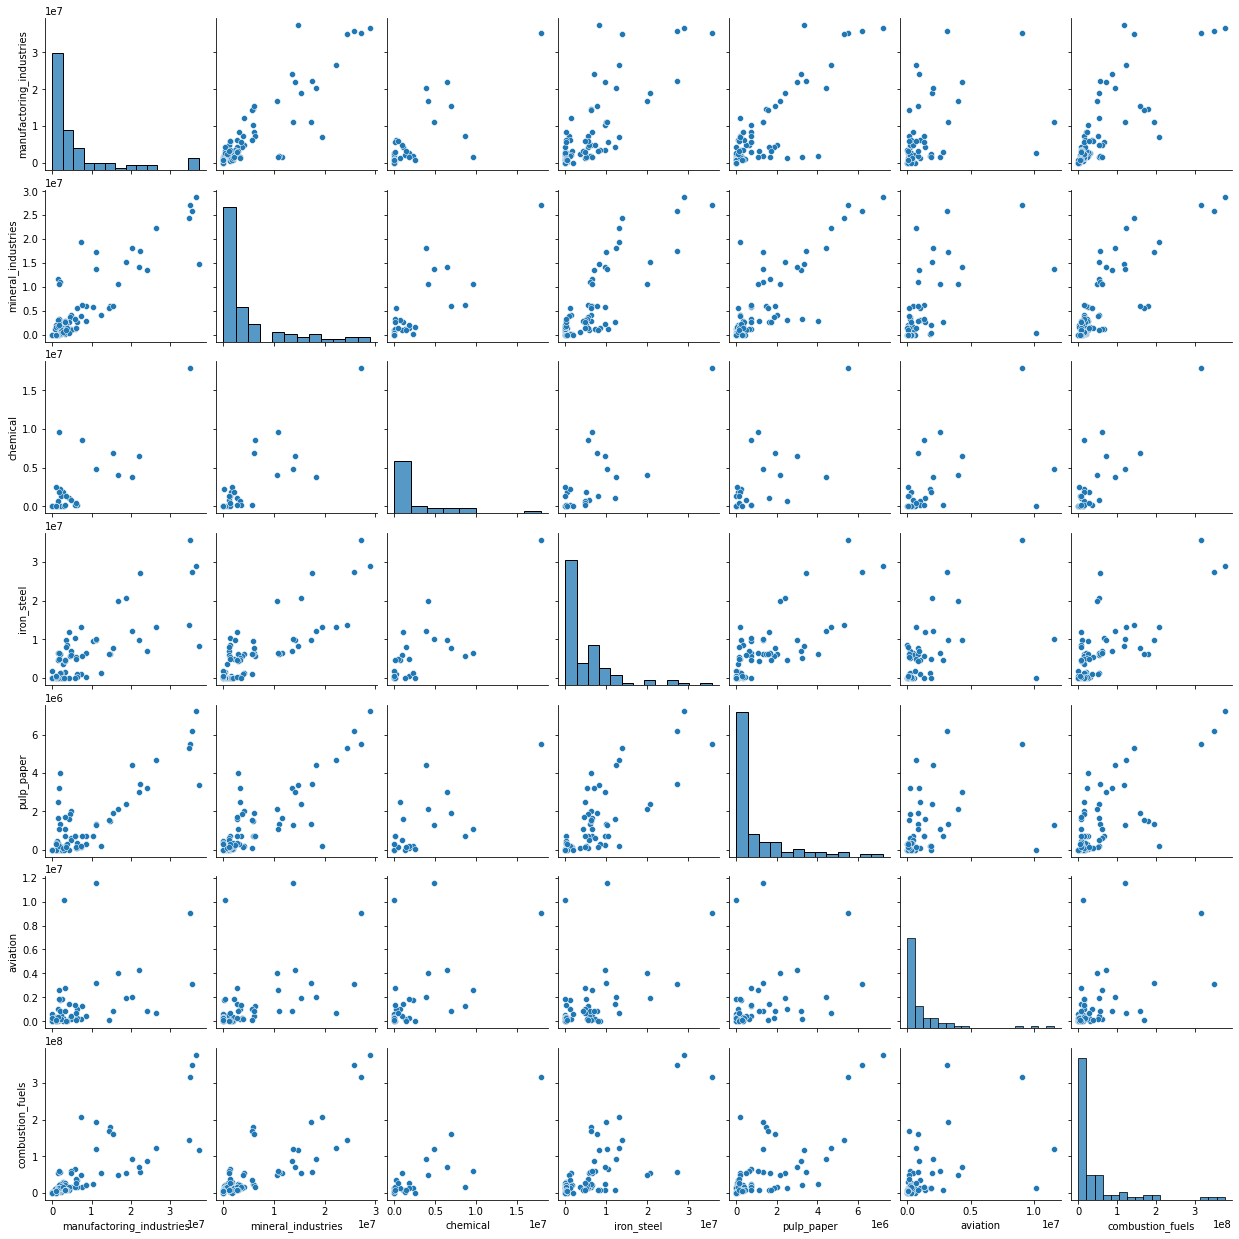

In [10]:
sns.pairplot(pd.DataFrame(basket_new), dropna = True)

# La soluzione è trasformare tutto in ordine log10 e poi standardizzare tramite min max


In [18]:
basket_log = np.log10(basket_new)
basket_log =  basket_log.replace(-np.inf , 0.0000001)
basket_log =  basket_log.fillna(0.0000001)

In [19]:
basket_log

main activity sector name                        manufactoring_industries  \
country        year                                                         
Austria        Total 1st trading period (05-07)              6.683159e+00   
               Total 2nd trading period (08-12)              6.643499e+00   
               Total 3rd trading period (13-20)              6.635007e+00   
Belgium        Total 1st trading period (05-07)              7.012947e+00   
               Total 2nd trading period (08-12)              6.932937e+00   
               Total 3rd trading period (13-20)              6.872905e+00   
Bulgaria       Total 1st trading period (05-07)              6.188657e+00   
               Total 2nd trading period (08-12)              6.440384e+00   
               Total 3rd trading period (13-20)              6.424975e+00   
Croatia        Total 1st trading period (05-07)              1.000000e-07   
               Total 2nd trading period (08-12)              1.000000e-07   
               Total 3rd trading period (13-20)              6.359814e+00   
Cyprus         Total 1st trading period (05-07)              6.204791e+00   
               Total 2nd trading period (08-12)              6.070115e+00   
               Total 3rd trading period (13-20)              6.119934e+00   
Czechia        Total 1st trading period (05-07)              6.754598e+00   
               Total 2nd trading period (08-12)              6.684406e+00   
               Total 3rd trading period (13-20)              6.686070e+00   
Denmark        Total 1st trading period (05-07)              6.499344e+00   
               Total 2nd trading period (08-12)              6.291346e+00   
               Total 3rd trading period (13-20)              6.353245e+00   
Estonia        Total 1st trading period (05-07)              6.016635e+00   
               Total 2nd trading period (08-12)              5.937221e+00   
               Total 3rd trading period (13-20)              5.808762e+00   
Finland        Total 1st trading period (05-07)              6.281543e+00   
               Total 2nd trading period (08-12)              6.208287e+00   
               Total 3rd trading period (13-20)              6.177746e+00   
France         Total 1st trading period (05-07)              7.348397e+00   
               Total 2nd trading period (08-12)              7.276688e+00   
               Total 3rd trading period (13-20)              7.225825e+00   
Germany        Total 1st trading period (05-07)              7.564740e+00   
               Total 2nd trading period (08-12)              7.553403e+00   
               Total 3rd trading period (13-20)              7.547761e+00   
Greece         Total 1st trading period (05-07)              7.090938e+00   
               Total 2nd trading period (08-12)              6.865147e+00   
               Total 3rd trading period (13-20)              6.806191e+00   
Hungary        Total 1st trading period (05-07)              6.504758e+00   
               Total 2nd trading period (08-12)              6.333960e+00   
               Total 3rd trading period (13-20)              6.271003e+00   
Iceland        Total 1st trading period (05-07)              1.000000e-07   
               Total 2nd trading period (08-12)              1.000000e-07   
               Total 3rd trading period (13-20)              1.000000e-07   
Ireland        Total 1st trading period (05-07)              6.633117e+00   
               Total 2nd trading period (08-12)              6.396514e+00   
               Total 3rd trading period (13-20)              6.461131e+00   
Italy          Total 1st trading period (05-07)              7.542737e+00   
               Total 2nd trading period (08-12)              7.423326e+00   
               Total 3rd trading period (13-20)              7.308552e+00   
Latvia         Total 1st trading period (05-07)              5.624231e+00   
               Total 2nd trading period (08-12)              5.814951e+00

# Vediamo cosa dicono i miei dati logaritmici


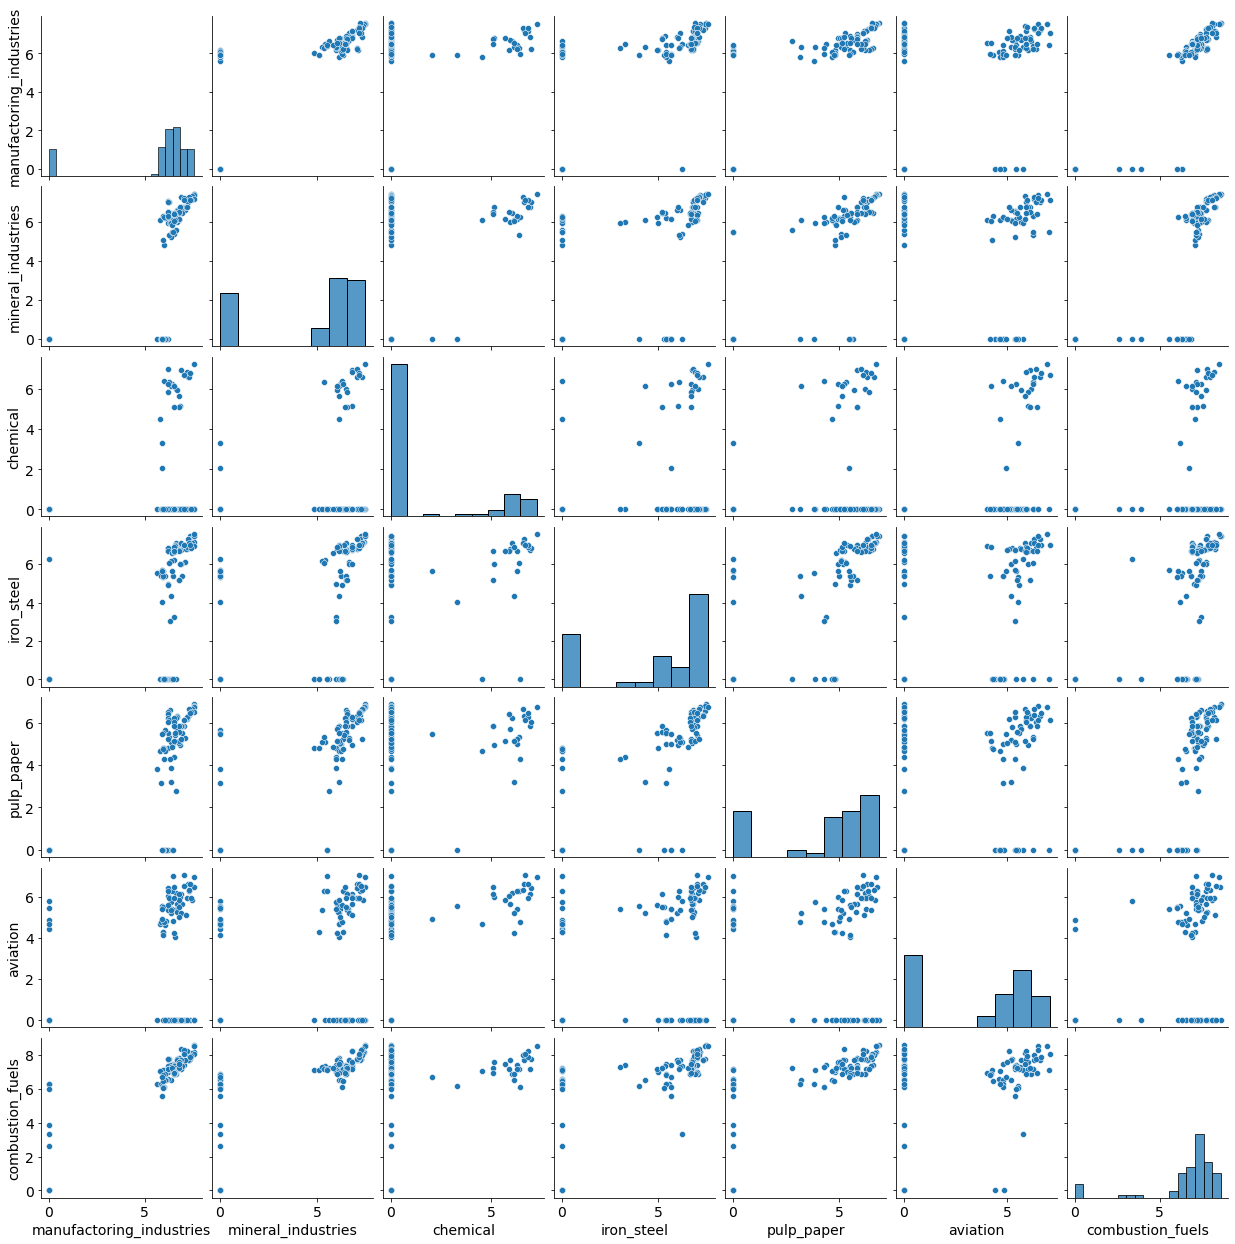

In [182]:
sns.pairplot(basket_log)

# Min Max Scaler

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler([-1,1])
scaler.fit(basket_log)

basket_scaled = scaler.transform(basket_log)

In [21]:
basket_scaled = pd.DataFrame(basket_scaled)


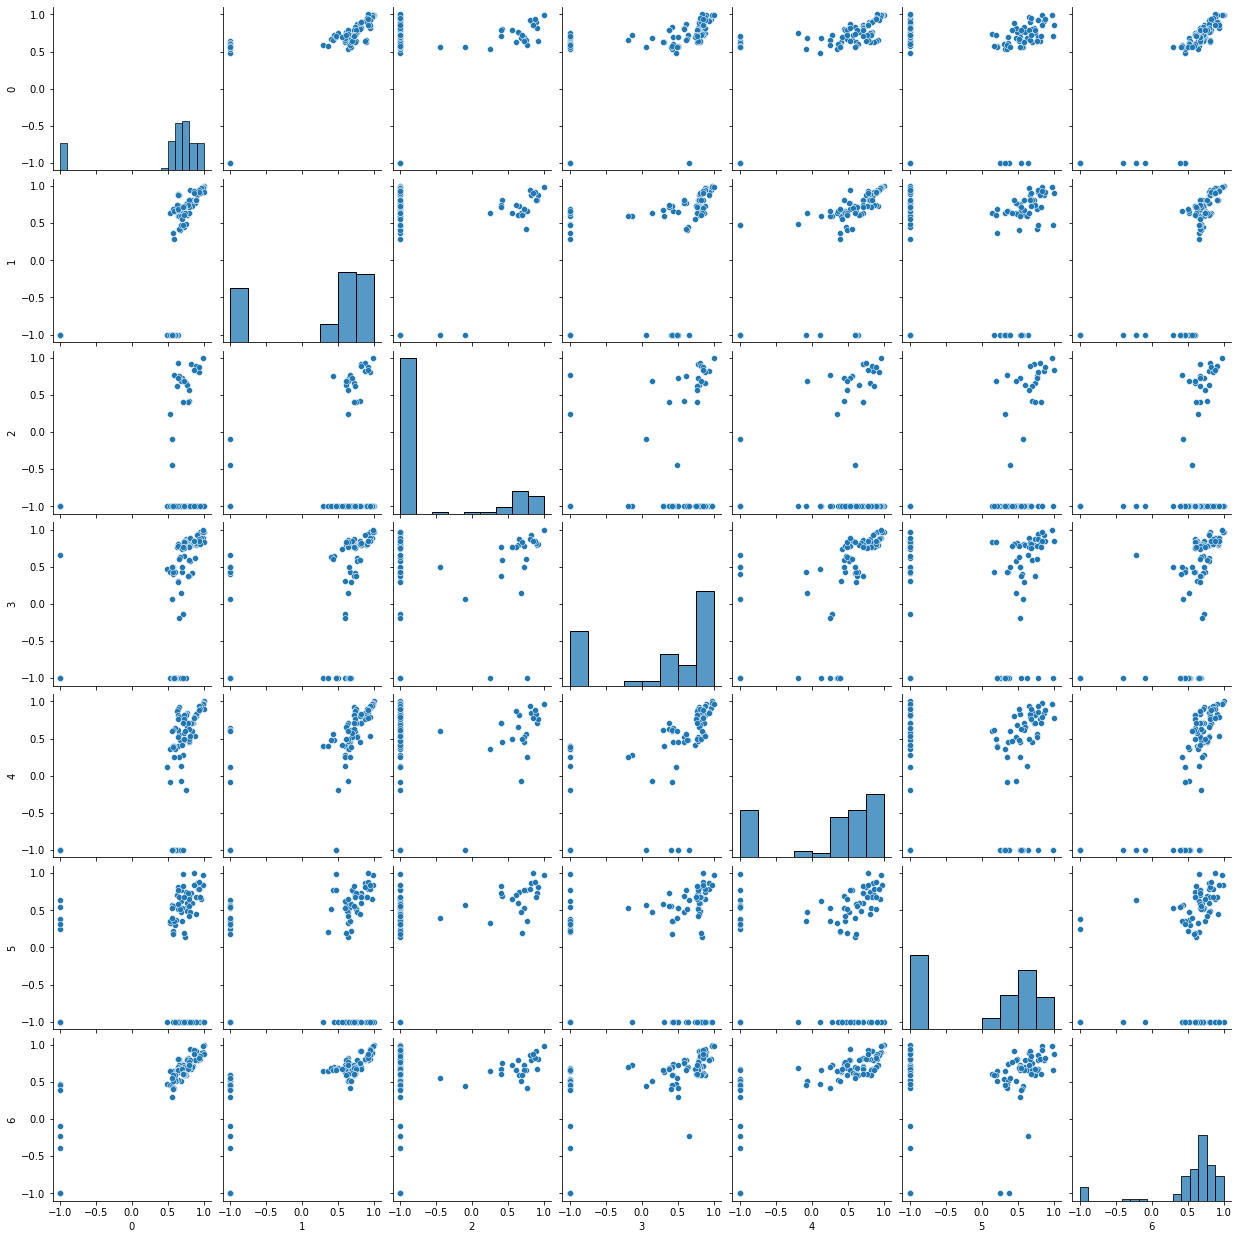

In [15]:
sns.pairplot(pd.DataFrame(basket_scaled), dropna = True)

# Applico l'algoritmo di clustering KMEANS++

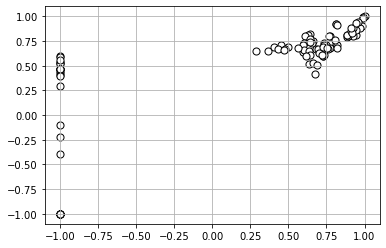

In [29]:
focus = [0,1,2,3,4,5,6]


arr = np.array(basket_scaled)

plt.scatter(arr[:,focus[1]], arr[:,focus[6]]
            , c='white'          # color filling the data markers
            , edgecolors='black' # edge color for data markers
            , marker='o'         # data marker shape, e.g. triangles (v<>^), square (s), star (*), ...
            , s=50)              # data marker size
plt.grid()  # plots a grid on the data
plt.show()

In [23]:
k_range = range(2,10)
rnd_state = 42

distortions = []
silhouette_scores = []
for i in k_range:
    km = KMeans(n_clusters=i, 
                init='random', 
                n_init=10, 
                max_iter=300, 
                random_state=rnd_state)
    y_km = km.fit_predict(basket_scaled)
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(basket_scaled,y_km))

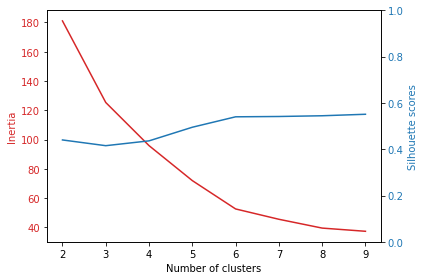

In [24]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)
 
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [25]:
good_k = 3
km = KMeans(n_clusters=good_k, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=rnd_state)
y_km = km.fit_predict(basket_scaled)

In [26]:
km.cluster_centers_

array([[ 0.75431839,  0.59094305, -0.98851748,  0.47401592,  0.62495665,
        -0.2254629 ,  0.73383699],
       [-0.27045503, -0.86608595, -0.95853977, -0.61153669, -0.9583663 ,
        -0.10991456, -0.02016127],
       [ 0.76082077,  0.75085155,  0.69990159,  0.57832989,  0.63525744,
         0.68747077,  0.72071104]])

In [27]:
def plot_clusters(X, y, dim, points,
                  labels_prefix = 'cluster', 
                  points_name = 'centroids',
                  colors = cm.tab10, # a qualitative map 
                      # https://matplotlib.org/examples/color/colormaps_reference.html
#                   colors = ['brown', 'orange', 'olive', 
#                             'green', 'cyan', 'blue', 
#                             'purple', 'pink'],
#                   points_color = 'red'
                  points_color = cm.tab10(10) # by default the last of the map (to be improved)
                 ):
    """
    Plot a two dimensional projection of an array of labelled points
    X:      array with at least two columns
    y:      vector of labels, length as number of rows in X
    dim:    the two columns to project, inside range of X columns, e.g. (0,1)
    points: additional points to plot as 'stars'
    labels_prefix: prefix to the labels for the legend ['cluster']
    points_name:   legend name for the additional points ['centroids']
    colors: a color map
    points_color: the color for the points
    """
    # plot the labelled (colored) dataset and the points
    labels = np.unique(y)
    for i in range(len(labels)):
        color = colors(i / len(labels)) # choose a color from the map
        plt.scatter(X[y==labels[i],dim[0]], 
                    X[y==labels[i],dim[1]], 
                    s=10, 
                    c = [color], # scatter requires a sequence of colors
                    marker='s', 
                    label=labels_prefix+str(labels[i]))
    plt.scatter(points[:,dim[0]], 
                points[:,dim[1]], 
                s=50, 
                marker='*', 
                c=[points_color], 
                label=points_name)
    plt.legend()
    plt.grid()
    plt.show()   

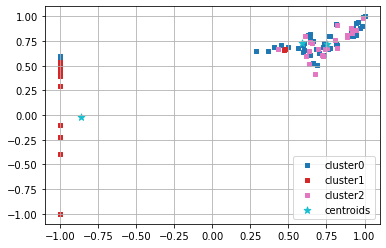

In [30]:
plot_clusters(arr,y_km,dim=(focus[1],focus[6]), points = km.cluster_centers_)

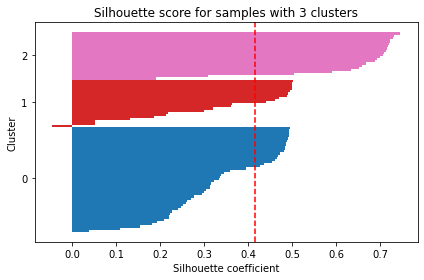

In [22]:
from plot_silhouette import plot_silhouette

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0] # it is the number of rows
# Compute the Silhouette Coefficient for each sample, with the euclidean metric
silhouette_score_samples = silhouette_samples(basket_scaled, y_km, metric='euclidean')
plt.title('Silhouette score for samples with {} clusters'.format(good_k))
plot_silhouette(silhouette_score_samples, y_km)

In [35]:
basket_scaled['target'] = km.labels_

# DB SCAN

In [195]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import MinMaxScaler

db = DBSCAN()
y_db = db.fit_predict(arr)
print(db)

DBSCAN()


In [196]:
cluster_labels_all = np.unique(y_db)
cluster_labels = cluster_labels_all[cluster_labels_all != -1]
n_clusters = len(cluster_labels)
if cluster_labels_all[0] == -1:
    noise = True
    print("There is noise")
else:
    noise = False
print("There is/are {} cluster(s)".format(n_clusters-noise))

There is noise
There is/are 2 cluster(s)


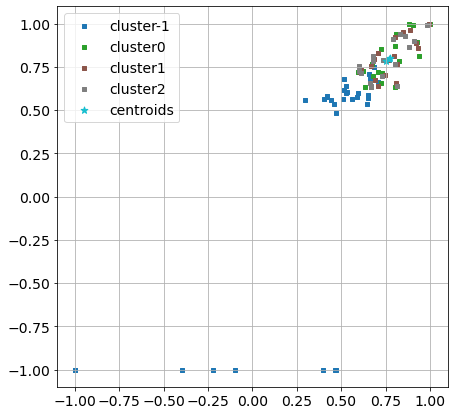

In [197]:
cluster_centers = np.empty((n_clusters,arr.shape[1]))
for i in cluster_labels:
    cluster_centers[i,:] = np.mean(arr[y_db==i,:], axis = 0)
plot_clusters(arr,y_db,dim=(focus[6],focus[0]), points = cluster_centers)

In [198]:
param_grid = {'eps': list(np.arange(0.1, 0.4, 0.01)), 'min_samples': list(range(1,10,1))}
params = list(ParameterGrid(param_grid))
sil_thr = 0  # visualize results only for combinations with silhouette above the threshold
# unc_thr = 33 # visualize results only for combinations with unclustered% below the threshold
unc_thr = 10 # visualize results only for combinations with unclustered% below the threshold

In [199]:
print("{:11}\t{:11}\t{:11}\t{:11}\t{:11}".\
      format('        eps','min_samples',' n_clusters',' silhouette', '    unclust%'))
for i in range(len(params)):
    db = DBSCAN(**(params[i]))
    y_db = db.fit_predict(arr)
    cluster_labels_all = np.unique(y_db)
    cluster_labels = cluster_labels_all[cluster_labels_all != -1]
    n_clusters = len(cluster_labels)
    if n_clusters > 1:
        X_cl = arr[y_db!=-1,:]
        y_db_cl = y_db[y_db!=-1]
        silhouette = silhouette_score(X_cl,y_db_cl)
        uncl_p = (1 - y_db_cl.shape[0]/y_db.shape[0]) * 100
        if silhouette > sil_thr and uncl_p < unc_thr:
            print("{:11.2f}\t{:11}\t{:11}\t{:11.2f}\t{:11.2f}%"\
                  .format(db.eps, db.min_samples, n_clusters, silhouette, uncl_p))

        eps	min_samples	 n_clusters	 silhouette	    unclust%
       0.10	          1	         89	       0.06	       0.00%
       0.11	          1	         87	       0.08	       0.00%
       0.12	          1	         86	       0.09	       0.00%
       0.13	          1	         84	       0.11	       0.00%
       0.14	          1	         82	       0.11	       0.00%
       0.15	          1	         79	       0.15	       0.00%
       0.16	          1	         77	       0.16	       0.00%
       0.17	          1	         77	       0.16	       0.00%
       0.18	          1	         74	       0.15	       0.00%
       0.19	          1	         71	       0.17	       0.00%
       0.20	          1	         68	       0.19	       0.00%
       0.21	          1	         66	       0.21	       0.00%
       0.22	          1	         64	       0.22	       0.00%
       0.23	          1	         62	       0.19	       0.00%
       0.24	          1	         57	       0.24	       0.00%
       0.25	          1	

In [204]:
# db = DBSCAN(eps=0.9, min_samples=4)
# db = DBSCAN(eps=0.28, min_samples=9)
# db = DBSCAN(eps=0.1, min_samples=9)
# db = DBSCAN(eps=0.05, min_samples=9)
db = DBSCAN(eps=0.40, min_samples=1)
y_db = db.fit_predict(arr)
cluster_labels_all = np.unique(y_db)
cluster_labels = cluster_labels_all[cluster_labels_all != -1]
n_clusters = len(cluster_labels)

In [205]:
print("There are {} clusters".format(n_clusters))

There are 30 clusters


In [206]:
print("The cluster labels are {}".format(cluster_labels))

The cluster labels are [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [203]:
cluster_centers

array([[ 0.80237563,  0.76894236, -1.        ,  0.71942228,  0.69535534,
        -1.        ,  0.77316402],
       [ 0.79378258,  0.77118079, -1.        ,  0.73342782,  0.72166715,
         0.56799763,  0.77159471],
       [ 0.78647866,  0.76714495,  0.72073646,  0.76734019,  0.70720427,
         0.73521886,  0.75126623]])

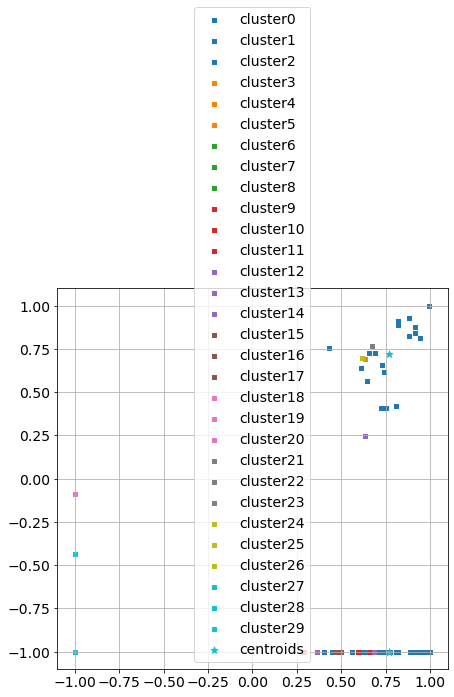

In [207]:
plot_clusters(arr,y_db,dim=(focus[1],focus[2]), points = cluster_centers)

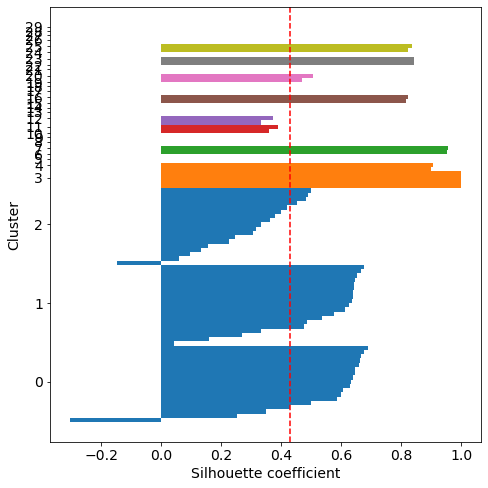

In [208]:
# X_cl = X[y_db!=-1,:]
# y_db_cl = y_db[y_db!=-1]
# silhouette = silhouette_samples(X_cl,y_db_cl)
# plot_silhouette(silhouette,y_db_cl)
silhouette = silhouette_samples(arr,y_db)
plot_silhouette(silhouette,y_db)

# MultiDimensional Scaling

In [31]:
from sklearn.manifold import MDS

In [32]:
basket_scaled

,0,1,2,3,4,5,6
0,0.764966,0.771413,-1.000000,0.798611,0.838928,-1.000000,0.675447
1,0.754492,0.759191,-1.000000,0.787346,0.828288,0.526413,0.667946
2,0.752250,0.727504,0.659073,0.874816,0.811041,0.743246,0.600908
3,0.852060,0.812084,-1.000000,0.848649,0.710259,-1.000000,0.722718
4,0.830930,0.819333,-1.000000,0.805334,0.708773,0.594303,0.705325
5,0.815077,0.820462,0.912795,0.787814,0.709357,0.733145,0.677489
6,0.634372,0.597663,-1.000000,0.314638,0.401120,-1.000000,0.636007
7,0.700851,0.664116,-1.000000,0.428053,0.457518,0.360272,0.745631
8,0.696782,0.655734,0.725558,0.497424,0.450058,0.535902,0.731357
9,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


In [36]:
mds = MDS(2,random_state=0)
X_2d = mds.fit_transform(basket_scaled)

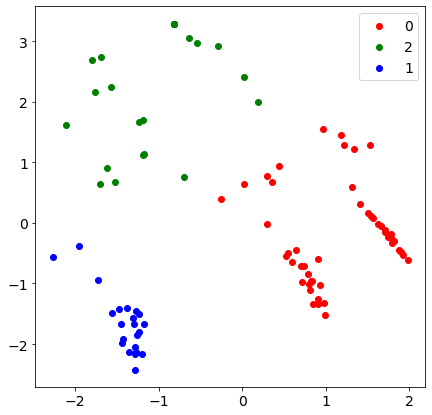

In [37]:
colors = ['red','green','blue']
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
for i in np.unique(basket_scaled.target):
  subset = X_2d[basket_scaled.target == i]
  x = [row[0] for row in subset]
  y = [row[1] for row in subset]
  plt.scatter(x,y,c=colors[i],label=basket_scaled['target'].unique()[i])
plt.legend()
plt.show()

In [132]:
mds.dissimilarity_matrix_

array([[0.        , 1.52659478, 3.13139869, ..., 0.45673806, 1.87197508,
        3.38809251],
       [1.52659478, 0.        , 2.61017048, ..., 1.59495321, 0.4693891 ,
        2.77717354],
       [3.13139869, 2.61017048, 0.        , ..., 3.1686697 , 2.63264038,
        0.47758636],
       ...,
       [0.45673806, 1.59495321, 3.1686697 , ..., 0.        , 1.8610222 ,
        3.38700108],
       [1.87197508, 0.4693891 , 2.63264038, ..., 1.8610222 , 0.        ,
        2.72538405],
       [3.38809251, 2.77717354, 0.47758636, ..., 3.38700108, 2.72538405,
        0.        ]])

Dissimilarity matrix

# PCA

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [50]:
principalComponents = pca.fit_transform(basket_scaled)

In [51]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'], index = basket_scaled.index)

In [52]:
principalDf.head(5)

,principal component 1,principal component 2
0,-0.489979,-1.404481
1,-0.823225,-0.780611
2,-1.457350,1.547848
3,-0.516396,-1.407968
4,-0.858323,-0.754664


In [53]:
basket_scaled[['target']].head()

,target
0,0
1,0
2,2
3,0
4,0


In [54]:
finalDf = pd.concat([principalDf, basket_scaled[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,-0.489979,-1.404481,0
1,-0.823225,-0.780611,0
2,-1.457350,1.547848,2
3,-0.516396,-1.407968,0
4,-0.858323,-0.754664,0


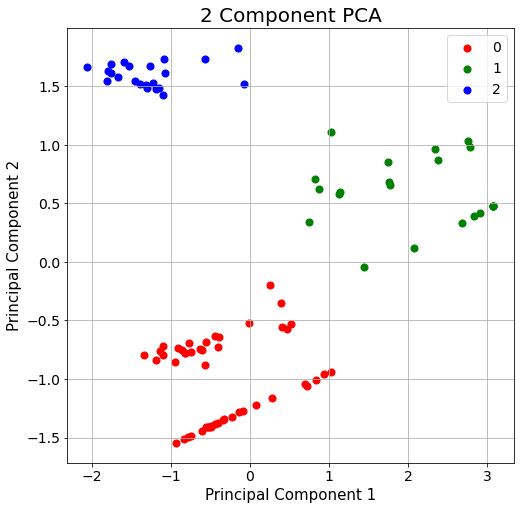

In [55]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               ,finalDf.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

In [58]:
pca.explained_variance_ratio_

array([0.46116273, 0.31697421])

Together, the first two principal components contain 77% of the information. The first principal component contains 55.2% of the variance and the second principal component contains 20.9% of the variance. The third and fourth principal component contained the rest of the variance of the dataset.

In [59]:
pca.noise_variance_

0.1519654486480768

La stima della covarianza del rumore seguendo il modello Probabilistic PCA di Tipping e Bishop 1999. Vedi “Pattern Recognition and Machine Learning” di C. Bishop, 12.2.1 p. 574 o http://www.miketipping.com/papers/met-mppca.pdf. È necessario calcolare la covarianza dei dati stimata e i campioni di punteggio.

Uguale alla media degli autovalori più piccoli (min(n_features, n_samples) - n_components) della matrice di covarianza di X.

In [60]:
pca.singular_values_

array([13.20464029, 10.94741142])

I valori singolari corrispondenti a ciascuno dei componenti selezionati. I valori singolari sono uguali alle 2 norme delle variabili n_components nello spazio dimensionale inferiore.

# Caratterizziamo i cluster

In [238]:
global_mean = []
for i in range(len(basket_log.columns)-1):
    x = basket_log.iloc[:,i].mean()
    global_mean.append(x)

In [239]:
global_mean

[5.730727945965659,
 4.790390857449206,
 1.515701515879053,
 4.690625256120034,
 4.2965978069297694,
 3.594133537814152,
 6.657239148897747]

In [240]:
first_list_df = [[],[],[]]
mean_cluster = [[],[],[]]
for i in range(3):
    first_list_df[i] = basket_log[basket_log['cluster'] == i]
    first_list_df[i] = first_list_df[i].sort_values(['country','year'])
    mean_cluster[i] = first_list_df[i].iloc[:][:].mean()

In [241]:
first_list_df[0]

main activity sector name                        manufactoring_industries  \
country        year                                                         
Austria        Total 1st trading period (05-07)                  6.683159   
               Total 2nd trading period (08-12)                  6.643499   
Belgium        Total 1st trading period (05-07)                  7.012947   
               Total 2nd trading period (08-12)                  6.932937   
Bulgaria       Total 1st trading period (05-07)                  6.188657   
               Total 2nd trading period (08-12)                  6.440384   
Czechia        Total 1st trading period (05-07)                  6.754598   
               Total 2nd trading period (08-12)                  6.684406   
Denmark        Total 1st trading period (05-07)                  6.499344   
               Total 2nd trading period (08-12)                  6.291346   
               Total 3rd trading period (13-20)                  6.353245   
Estonia        Total 1st trading period (05-07)                  6.016635   
               Total 2nd trading period (08-12)                  5.937221   
Finland        Total 1st trading period (05-07)                  6.281543   
               Total 2nd trading period (08-12)                  6.208287   
France         Total 1st trading period (05-07)                  7.348397   
               Total 2nd trading period (08-12)                  7.276688   
Germany        Total 1st trading period (05-07)                  7.564740   
               Total 2nd trading period (08-12)                  7.553403   
Greece         Total 1st trading period (05-07)                  7.090938   
               Total 2nd trading period (08-12)                  6.865147   
Hungary        Total 1st trading period (05-07)                  6.504758   
               Total 2nd trading period (08-12)                  6.333960   
Ireland        Total 1st trading period (05-07)                  6.633117   
Italy          Total 1st trading period (05-07)                  7.542737   
               Total 2nd trading period (08-12)                  7.423326   
Latvia         Total 1st trading period (05-07)                  5.624231   
Lithuania      Total 1st trading period (05-07)                  6.059391   
               Total 2nd trading period (08-12)                  5.927923   
Netherlands    Total 1st trading period (05-07)                  6.189901   
               Total 2nd trading period (08-12)                  6.266856   
Norway         Total 2nd trading period (08-12)                  6.189080   
Poland         Total 1st trading period (05-07)                  7.167381   
               Total 2nd trading period (08-12)                  7.156503   
Portugal       Total 1st trading period (05-07)                  6.928938   
               Total 2nd trading period (08-12)                  6.794025   
Romania        Total 1st trading period (05-07)                  6.419002   
               Total 2nd trading period (08-12)                  6.781081   
Slovakia       Total 1st trading period (05-07)                  6.545116   
               Total 2nd trading period (08-12)                  6.562792   
Slovenia       Total 1st trading period (05-07)                  6.056442   
               Total 2nd trading period (08-12)                  5.963209   
               Total 3rd trading period (13-20)                  5.911782   
Spain          Total 1st trading period (05-07)                  7.573130   
               Total 2nd trading period (08-12)                  7.384028   
Sweden         Total 1st trading period (05-07)                  6.517792   
               Total 2nd trading period (08-12)                  6.512258   
United Kingdom Total 1st trading period (05-07)                  6.858362   
               Total 2nd trading period (08-12)                  7.044554   

main activity sector name                        mineral_industries  \
c

In [245]:
def var_perc(xf,xi):
    """
    Calcola la sola variazione percentuale
    xf: valore fine
    ci: valore iniziale
    """
    ris = xf-xi
    ris = ris/xi*100
    return ris

In [242]:
def scostamento(mean_cluster,global_m):
    """
    Calcola la variazione percentuale tra media globale e media di ogni attributo dei cluster e ritorna lo scostamento
    mean_cluster: array contenete le medie di ogni attributo
    global_m: media globale
    
    """
    res_var = []
    for i in range(len(mean_cluster)-1):
        var_perc = var_perc(mean_cluster[i],global_m[i])
        res_var.append(var_perc)
    return res_var    

In [243]:
help(scostamento)

Help on function scostamento in module __main__:

scostamento(mean_cluster, global_m)
    Calcola la variazione percentuale tra media globale e media di ogni attributo dei cluster e ritorna lo scostamento
    mean_cluster: array contenete le medie di ogni attributo
    global_m: media globale



In [237]:
first_scost = [[],[],[]]
for i in range(3):
    first_scost[i] = scostamento(mean_cluster[i],global_mean)

In [244]:
first_scost[0]

[15.916176725678294,
 23.89582891129684,
 -97.25288115074426,
 18.690869330715834,
 29.70144678364395,
 -23.90339004639741,
 11.689907650614874]

# Cluster 2 :
 * scostamento per le emissioni delle industrie manufatturiere : 16%
 * scostamento per le emissioni delle industrie minerarie 36%
 * scostamento per le emissioni delle industrie chimiche 306%
 * scostamento per le emissioni delle industrie di ferro e acciao 27%
 * scostamento per le emissioni delle industrie della lavorazione di carta da macero 30%
 * scostamento per le emissioni di aviazione -10%
 * scostamento per le emissioni di cumbostibili fossili 105%
 
 CLUSTER SCOSTAMENTO TERZO PERIODO
 
 # Cluster 1 : cluster con paesi con pochissime emissioni(malta,cypro,lich,isl)
 * scostamento per le emissioni delle industrie manufatturiere : -51%
 * scostamento per le emissioni delle industrie minerarie -89%
 * scostamento per le emissioni delle industrie chimiche -90%
 * scostamento per le emissioni delle industrie di ferro e acciao -68%
 * scostamento per le emissioni delle industrie della lavorazione di carta da macero -96%
 * scostamento per le emissioni di aviazione -52%
 * scostamento per le emissioni di cumbostibili fossili 16%
 
 CLUSTER SCOSTAMENTO POCHE EMISSIONI
 
 # Cluster 0 :
 * scostamento per le emissioni delle industrie manufatturiere : 15%
 * scostamento per le emissioni delle industrie minerarie -23%
 * scostamento per le emissioni delle industrie chimiche -97%
 * scostamento per le emissioni delle industrie di ferro e acciao 18%
 * scostamento per le emissioni delle industrie della lavorazione di carta da macero 29%
 * scostamento per le emissioni di aviazione -58%
 * scostamento per le emissioni di cumbostibili fossili 106%
  
  CLUSTER SCOSTAMENTO 1 E 2 PERIODO

In [271]:
d = cluster_2.index.get_level_values('country').unique()
d

Index(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Italy',
       'Lithuania', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Spain', 'Sweden', 'United Kingdom'],
      dtype='object', name='country')

In [318]:
#[str(i) for i in range(len(cluster.columns))
# 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
def scost_country(cluster,global_me):
    """
    La funzione non fa altro che clacolare lo scostamento per ogni attributo e ogni paese di ogni cluster rispetto alla media globale.
    cluster: inserire qui il cluster su cui si vuole calcolare lo scostamento.
    global_me: media globale da utilizzare
    ritorna il nuovo df con tutti gli scostamenti calcolati.
    """
    s0 = pd.Series([str(i) for i in range(len(cluster.index.get_level_values('country').unique()))] ,name='paese')
    s1 = pd.Series(0, name='scost_man_ind')
    s2 = pd.Series(0, name='scost_min_ind')
    s3 = pd.Series(0, name='scost_chemical')
    s4 = pd.Series(0, name='scost_iron')
    s5 = pd.Series(0, name='scost_paper')
    s6 = pd.Series(0, name='scost_aviation')
    s7 = pd.Series(0, name='scost_fuels')
    df_cl = pd.concat([s0,s1,s2,s3,s4,s5,s6,s7], axis=1)
    count = 0
    for i in range(len(cluster.index.get_level_values('country').unique())):
        a = cluster.xs(cluster.index[count][0],level='country')
        df_cl.iloc[i,0] = cluster.index[count][0]
        count = count + len(cluster.xs(cluster.index[count][0],level='country'))
        df_cl.iloc[i,1] = var_perc(a['manufactoring_industries'].mean(),global_me[0])
        df_cl.iloc[i,2] = var_perc(a['mineral_industries'].mean(),  global_me[1])
        df_cl.iloc[i,3] = var_perc(a['chemical'].mean(),global_me[2])
        df_cl.iloc[i,4] = var_perc(a['iron_steel'].mean(),global_me[3])
        df_cl.iloc[i,5] = var_perc(a['pulp_paper'].mean(),global_me[4])
        df_cl.iloc[i,6] = var_perc(a['aviation'].mean(),global_me[5])
        df_cl.iloc[i,7] = var_perc(a['combustion_fuels'].mean(),global_me[6])
    return df_cl
    

* Calcoliamo ora grazie alla funzione scost_country lo scostamento per ogni paese *

In [319]:
df_cl = [[],[],[]]
for i in range(3):
    df_cl[i] = scost_country(first_list_df[i],global_mean) 

In [322]:
df_cl[2]

,paese,scost_man_ind,scost_min_ind,scost_chemical,scost_iron,scost_paper,scost_aviation,scost_fuels
0,Austria,15.779479,34.530636,296.921573,50.964115,44.554431,71.270138,3.126943
1,Belgium,19.930756,41.769753,357.622792,43.958524,36.438145,70.277816,8.060090
2,Bulgaria,12.114457,28.941505,312.827683,20.575704,15.741290,50.899031,11.530167
3,Croatia,10.977425,27.364488,304.111400,-7.899298,-25.639998,44.759381,-2.171495
4,Czechia,16.670511,25.322405,292.149891,44.288684,32.289097,57.519449,16.061769
5,Estonia,1.361677,27.421365,198.293246,-99.999998,8.099654,30.244352,5.962422
6,Finland,7.800374,35.738056,286.699274,42.265165,48.888403,67.316661,7.404682
7,France,26.089134,46.713115,336.440054,55.661333,47.397495,83.781738,15.427786
8,Germany,31.706853,55.191502,378.486066,61.044216,56.935387,93.540305,27.704366
9,Greece,18.766596,40.832604,239.171529,28.064596,15.536303,66.949500,13.576236


* Ora creiamo una classifica grazie ad rank_cl

In [326]:
def rank_cl(df):
    """
    La funzione cerca di ricreare la classifica per ogni attributo valutando tutti gli scostamenti
    df: passare il dataframe da classificare
    ritorna il nuovo df classificato.
    """
    new_df= pd.DataFrame(np.random.rand(len(df.iloc[:,0]),len(df.iloc[0,:])),
                     columns=['Rank_'+str(i) for i in range(len(df.iloc[0,:]))])
    for i in range(len(df.iloc[0,:])):
         new_df.iloc[:,i] = df.iloc[:,i].rank()
        
    return new_df
    

In [327]:
ranked_cl = [[],[],[]]
for i in range(3):
    ranked_cl[i] = rank_cl(df_cl[i])

ValueError: Must have equal len keys and value when setting with an iterable

In [328]:
def rank_media(rank_clus):
    """
    La funzione crea la media dei ranking di ogni paese e poi classifica tutti i paesi.
    rank_clus: passare il cluster su cui attuare la funzione.
    """
    r=[]
    for i in range(len(rank_clus.index)):
        x = rank_clus.iloc[i,1:].astype(float).mean() 
        r.append(x)
    
    rank_clus['media_rank_paese'] = r
    rank_clus['media_rank_paese'] = rank_clus['media_rank_paese'].rank()

In [291]:
for i in range(3):
    rank_media(ranked_cl[i])

In [292]:
for i in range(3):
    ranked_cl[i].Rank_0 = df_cl[i].paese

In [293]:
ranked_cl

[            Rank_0  Rank_1  Rank_2  Rank_3  Rank_4  Rank_5  Rank_6  Rank_7  \
 0          Austria    15.0    16.0    12.5    15.0    20.0    13.0     8.0   
 1          Belgium    19.0    19.0    12.5    19.0    16.0    15.0    14.0   
 2         Bulgaria     8.0     8.0    12.5     6.0     6.0     6.0    10.0   
 3          Czechia    16.0     9.0    12.5    20.0    15.0    10.0    20.0   
 4          Denmark     9.0     6.0    12.5     4.0     3.0    24.0    12.0   
 5          Estonia     2.0     3.0    12.5     2.0     5.0     4.0     6.0   
 6          Finland     7.0    15.0    12.5    14.0    23.0    12.0    15.0   
 7           France    22.0    22.0    12.5    24.0    21.0    21.0    18.0   
 8          Germany    25.0    25.0    12.5    25.0    25.0    22.0    25.0   
 9           Greece    20.0    17.0    12.5    10.0     9.0     9.0    17.0   
 10         Hungary    10.0     4.0    12.5    11.0     8.0    11.0    13.0   
 11         Ireland    14.0     5.0    12.5     2.0 

# Clusterizziamo il cluster 2 per ricavare delle informazioni maggiori e caratterizzarlo


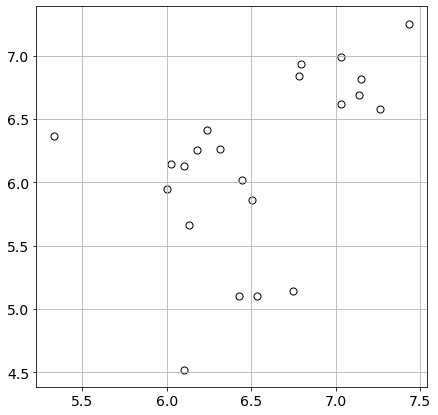

In [87]:
 focus = [0,1,2,3,4,5,6]


arr = np.array(cluster_2)

plt.scatter(arr[:,focus[1]], arr[:,focus[2]]
            , c='white'          # color filling the data markers
            , edgecolors='black' # edge color for data markers
            , marker='o'         # data marker shape, e.g. triangles (v<>^), square (s), star (*), ...
            , s=50)              # data marker size
plt.grid()  # plots a grid on the data
plt.show()

In [88]:
k_range = range(2,10)
rnd_state = 42

distortions = []
silhouette_scores = []
for i in k_range:
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=rnd_state)
    y_km = km.fit_predict(cluster_2)
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(cluster_2,y_km))

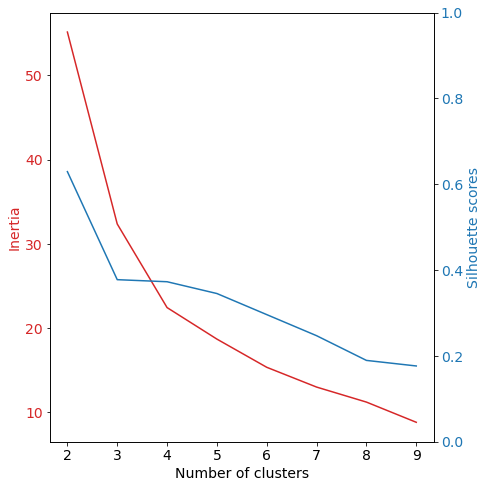

In [89]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [90]:
good_k = 3
km = KMeans(n_clusters=good_k, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=rnd_state)
y_km = km.fit_predict(cluster_2)

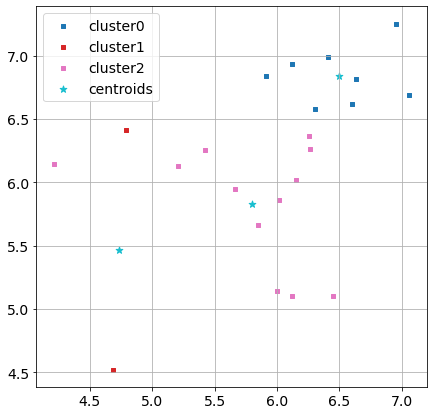

In [91]:
plot_clusters(arr,y_km,dim=(focus[5],focus[2]), points = km.cluster_centers_)

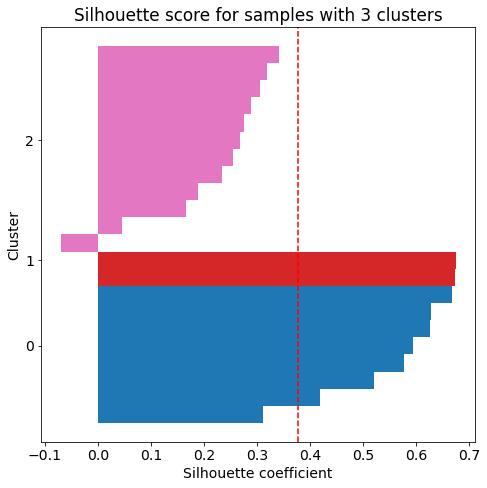

In [92]:
# from plot_silhouette import plot_silhouette
from plot_silhouette import plot_silhouette

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0] # it is the number of rows
# Compute the Silhouette Coefficient for each sample, with the euclidean metric
silhouette_score_samples = silhouette_samples(cluster_2, y_km, metric='euclidean')
plt.title('Silhouette score for samples with {} clusters'.format(good_k))
plot_silhouette(silhouette_score_samples, y_km)

In [93]:
cluster_2['target'] = km.labels_

In [94]:
#del cluster_2['cluster']
cluster_2

,main activity sector name,manufactoring_industries,mineral_industries,chemical,iron_steel,pulp_paper,aviation,combustion_fuels,cluster,target
country,year,,,,,,,,,
Austria,Total 3rd trading period (13-20),6.635007,6.444543,6.016146,7.081161e+00,6.210923,6.155677,6.865407,2,2
Belgium,Total 3rd trading period (13-20),6.872905,6.791325,6.936196,6.752555e+00,5.862198,6.120012,7.193819,2,0
Bulgaria,Total 3rd trading period (13-20),6.424975,6.176802,6.257235,5.655754e+00,4.972938,5.423513,7.424830,2,2
Croatia,Total 3rd trading period (13-20),6.359814,6.101257,6.125123,4.320099e+00,3.194950,5.202845,6.512678,2,2
Czechia,Total 3rd trading period (13-20),6.686070,6.003433,5.943822,6.768041e+00,5.683930,5.661459,7.726510,2,2
Estonia,Total 3rd trading period (13-20),5.808762,6.103981,4.521235,1.000000e-07,4.644607,4.681156,7.054172,2,1
Finland,Total 3rd trading period (13-20),6.177746,6.502383,5.861207,6.673126e+00,6.397136,6.013584,7.150187,2,2
France,Total 3rd trading period (13-20),7.225825,7.028132,6.615129,7.301490e+00,6.333078,6.605361,7.684304,2,0
Germany,Total 3rd trading period (13-20),7.547761,7.434280,7.252421,7.553981e+00,6.742882,6.956097,8.501585,2,0


CREO LE MEDIA GLOBALI PER IL DATAF CLUSTER 2

In [294]:
global_mean_cluster_2 = []
for i in range(len(cluster_2.columns)):
    x = cluster_2.iloc[:,i].mean()
    global_mean_cluster_2.append(x)

In [295]:
global_mean_cluster_2 # xi

[6.667462418163402,
 6.531641291383735,
 6.16420062445145,
 5.961336751620592,
 5.608075850659769,
 5.958727739543961,
 7.3791743499472595,
 2.0,
 1.1818181818181819]

In [296]:
list_df = [[],[],[]]
mean_cluster = [[],[],[]]
for i in range(3):
    list_df[i] = cluster_2[cluster_2['target'] == i]
    list_df[i] = list_df[i].sort_values(['country','year'])
    mean_cluster[i] = list_df[i].iloc[:][:].mean()
    

In [297]:
mean_cluster[0] #xf

main activity sector name
manufactoring_industries    7.093565
mineral_industries          7.076815
chemical                    6.838050
iron_steel                  7.050277
pulp_paper                  6.310718
aviation                    6.501822
combustion_fuels            7.907345
cluster                     2.000000
target                      0.000000
dtype: float64

In [298]:
scost = [[],[],[]]
for i in range(3):
    scost[i] = scostamento(mean_cluster[i],global_mean_cluster_2)

In [299]:
del list_df[1]['cluster']

In [300]:
scost

[[6.390777432677548,
  8.346649618944783,
  10.931661992216432,
  18.26670553054971,
  12.529117687906002,
  9.114264986957116,
  7.157591154375553,
  0.0],
 [-11.535887397537328,
  -5.546075233769384,
  -11.326715114896885,
  -99.99999832252388,
  -20.28264653268598,
  -20.5382207737364,
  -10.998211254670615,
  0.0],
 [-2.337870388862131,
  -4.640087207001583,
  -5.3999888089948715,
  4.4888627000541135,
  -4.972304036489671,
  -2.6531398623486595,
  -2.9386922271385916,
  0.0]]

In [301]:
list_df_scost = [[],[],[]]

In [305]:
for i in range(3):
    list_df_scost[i] = scost_country(list_df[i])

In [306]:
list_df_scost[0]

,paese,scost_man_ind,scost_min_ind,scost_chemical,scost_iron,scost_paper,scost_aviation,scost_fuels
0,Belgium,3.081276,3.975785,12.523846,13.272495,4.531367,2.706691,-2.511877
1,France,8.374442,7.601311,7.315270,22.480748,12.927815,10.851869,4.135007
2,Germany,13.202909,13.819471,17.653870,26.716221,20.235221,16.737957,15.210519
3,Italy,9.615193,11.151741,6.751432,18.931458,18.511107,5.849598,8.014216
4,Netherlands,-6.796296,7.630464,13.313102,14.374238,7.533917,7.595454,5.391538
5,Poland,7.783563,3.814541,10.933688,15.606229,11.994499,-0.714281,11.176874
6,Spain,10.131863,9.480503,10.494490,17.263882,15.514064,11.366260,6.356814
7,United Kingdom,5.733268,9.299382,8.467599,17.488374,8.984950,18.520571,9.487637


In [307]:
list_rank=[[],[],[]]
for i in range(3):
    list_rank[i] = rank_cl(list_df_scost[i])

In [308]:
list_rank

[   Rank_0  Rank_1  Rank_2  Rank_3  Rank_4  Rank_5  Rank_6  Rank_7
 0     1.0     2.0     2.0     6.0     1.0     1.0     2.0     1.0
 1     2.0     5.0     3.0     2.0     7.0     5.0     5.0     2.0
 2     3.0     8.0     8.0     8.0     8.0     8.0     7.0     8.0
 3     4.0     6.0     7.0     1.0     6.0     7.0     3.0     5.0
 4     5.0     1.0     4.0     7.0     2.0     2.0     4.0     3.0
 5     6.0     4.0     1.0     5.0     3.0     4.0     1.0     7.0
 6     7.0     7.0     6.0     4.0     4.0     6.0     6.0     4.0
 7     8.0     3.0     5.0     3.0     5.0     3.0     8.0     6.0,
    Rank_0  Rank_1  Rank_2  Rank_3  Rank_4  Rank_5  Rank_6  Rank_7
 0     1.0     1.0     1.0     1.0     1.5     2.0     1.0     2.0
 1     2.0     2.0     2.0     2.0     1.5     1.0     2.0     1.0,
     Rank_0  Rank_1  Rank_2  Rank_3  Rank_4  Rank_5  Rank_6  Rank_7
 0      1.0     8.0     9.0     7.0    12.0    11.0     9.0     3.0
 1      2.0     5.0     6.0    10.0     3.0     3.0     3.

In [309]:
def rank_media(rank_clus):
    r=[]
    for i in range(len(rank_clus.index)):
        x = rank_clus.iloc[i,1:].astype(float).mean() 
        r.append(x)
    
    rank_clus['media_rank_paese'] = r
    rank_clus['media_rank_paese'] = rank_clus['media_rank_paese'].rank()
    

In [310]:
for i in range(3):
    rank_media(list_rank[i])

In [311]:
for i in range(3):
    list_rank[i].Rank_0 = list_df_scost[i].paese

In [312]:
list_rank

[           Rank_0  Rank_1  Rank_2  Rank_3  Rank_4  Rank_5  Rank_6  Rank_7  \
 0         Belgium     2.0     2.0     6.0     1.0     1.0     2.0     1.0   
 1          France     5.0     3.0     2.0     7.0     5.0     5.0     2.0   
 2         Germany     8.0     8.0     8.0     8.0     8.0     7.0     8.0   
 3           Italy     6.0     7.0     1.0     6.0     7.0     3.0     5.0   
 4     Netherlands     1.0     4.0     7.0     2.0     2.0     4.0     3.0   
 5          Poland     4.0     1.0     5.0     3.0     4.0     1.0     7.0   
 6           Spain     7.0     6.0     4.0     4.0     6.0     6.0     4.0   
 7  United Kingdom     3.0     5.0     3.0     5.0     3.0     8.0     6.0   
 
    media_rank_paese  
 0               1.0  
 1               4.0  
 2               8.0  
 3               6.0  
 4               2.0  
 5               3.0  
 6               7.0  
 7               5.0  ,
       Rank_0  Rank_1  Rank_2  Rank_3  Rank_4  Rank_5  Rank_6  Rank_7  \
 0    Estonia  

In [199]:
for i in range(3):
    list_rank[i].to_csv('rank_cluster_'+ str(i) +'_emissioni_cluster_2.csv')